## 01 - Problem (case study) 

### Data Description

A customer analysis (or customer profile) is a critical section of a company's business plan or marketing plan. It identifies target customers, ascertains the needs of these customers, and then specifies how the product satisfies these needs.We are going to analyze customer behaviour in an auto-insurance company in USA. The purpose of study is to identify how does total claim amount changes with a change in other numerical variables e.g. customer lifetime value, income changes etc and also to analyze the impact with respect to different states, marital, and employment status of users. 

### Goal

Goal of study is to anaylze the impact of different numerical and categorical variables on total claim amount of users in an auto-insurance company. 

## 02 - Getting Data

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read the .csv file. 

In [2]:
df = pd.read_csv(r"C:\Users\s_sad\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv", header = 0, index_col = 0)

## 03 - Cleaning/Wrangling/EDA

In [3]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null 

In [4]:
#shape of dataFrame
df.shape

(10910, 25)

### Change headers names

In [5]:
#Standardize header names
#1. user lower case
df.columns = df.columns.str.lower()

In [6]:
#renaming
df.rename(columns={'customer': 'customer id', 'employmentstatus': 'employment status'}, inplace = True)

In [7]:
#3.removing spaces and adding underscore
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [8]:
df.columns

Index(['customer_id', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

### Numerical Features 

In [9]:
#Which variables are numerical


### Categorical Features 

In [10]:
#which variables are categorical?
df.select_dtypes(exclude=[np.number])

,customer_id,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


### Deal with NaN values 

In [11]:
#check and deal with nan
df.isna().sum() # checking NAN

customer_id                         0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [12]:
#Replacing NAN with mode(State,Vehicle_class,Vehicle_size, months_since_last_claim,)
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].mode()[0])

df['state'].isna().sum()
df['vehicle_class'].isna().sum()
df['vehicle_size'].isna().sum()

0

In [13]:
#Replacing NAN with 0( number_of_open_complaints)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0)
df['number_of_open_complaints'].isna().sum()

0

In [14]:
#Replacing NAN with 'unknown' for Response
df['response'] = df['response'].fillna('unknown')

In [15]:
#Removing column name vehicle_type. as we see that nearly half of observations from vehicle_type are missing, therefore it is better to drop this column. 
df = df.drop(columns=['vehicle_type'])

In [16]:
df

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [17]:
#Dealing with Datetime column
from datetime import date
df['effective_to_date']

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10905    1/19/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
10909     1/8/11
Name: effective_to_date, Length: 10910, dtype: object

In [18]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['effective_to_date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective_to_date, Length: 10910, dtype: datetime64[ns]

In [19]:
df.isna().sum() # all nans have been removed from data.

customer_id                      0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Exploration

In [20]:
#data describtion
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,14.444180,48.091934,0.361962,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.187488,27.940675,0.890134,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Big difference b/w mean and standard deviation of each variable represents high volatility in dataset.Except months_since_policy_inspection all the variables have high variablity or spread of observations. Except months_since_policy_inception, none of variables have same mean and median, which also confirms that none of them have normal distribution. 

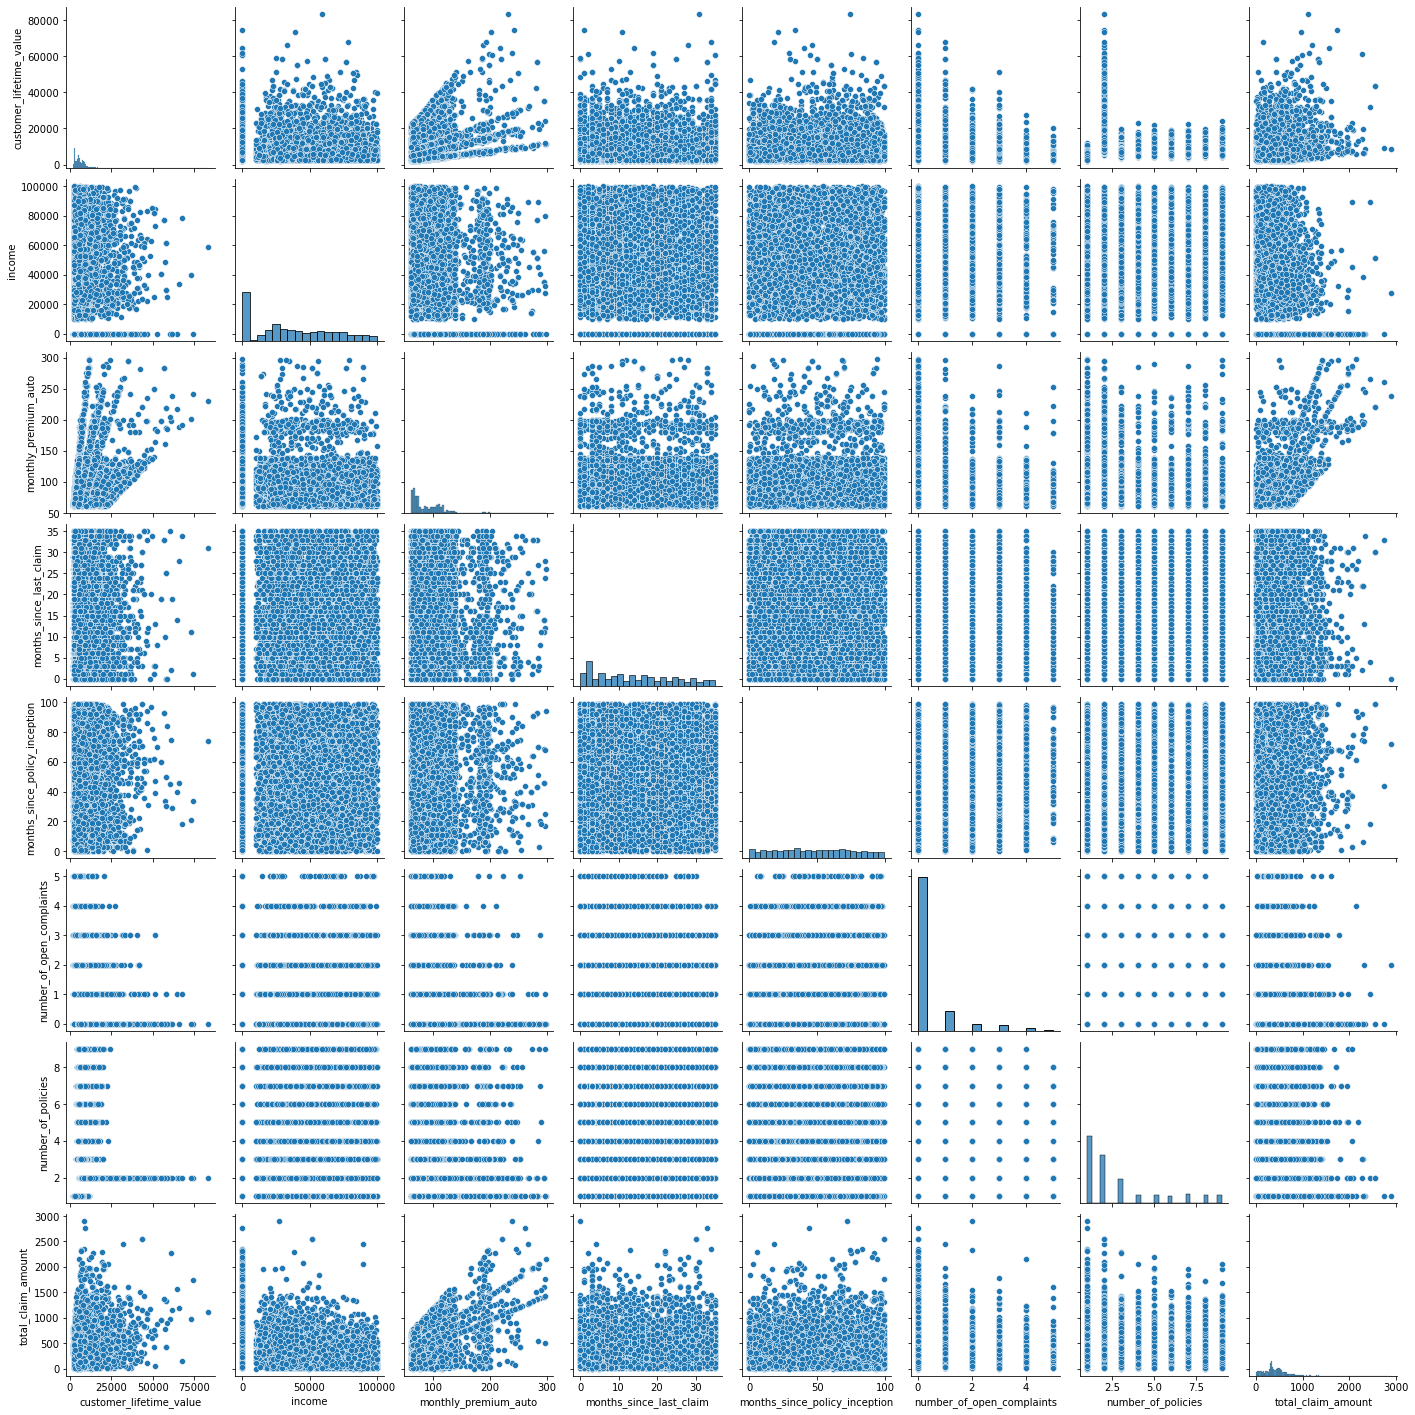

In [21]:
# let us know have a look on bivariate relationship.
sns.pairplot(df)

In [22]:
df_corr = df.corr() # pearson's correlation
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799
months_since_last_claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380
number_of_policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000


1. correlation coefficients shows that customer lifetime value is strongly positively related with monthly_premium_auto and total claim amount. 
2. Income is strongly inversily related with total_claim_amount.
3.Similarly monthly_premium_auto is strongly positively related with customer lifetime value and total claim amount.
4.months since last claim, months since policy inception, no. of open complaints,no. of policies, does not show any significant relationship with anyother variable.
5. total claim amount have (+)relationship with customer lifetime value and monthly premium auto, (-)ve relationship with income


#### Dealing with multicollinearity 

In [23]:
#def_corr shows that none of variables are strongly related with each other. We assume that for multicollinearity to exist correlation coefficients should be at least greater than 0.8. let us check that.
correlation = df.corr() # pearson correlation
mask = correlation > 0.8
correlation[mask]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
months_since_last_claim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
months_since_policy_inception,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
number_of_open_complaints,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
number_of_policies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
total_claim_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
#correlation b/w total_claim_amount and other variables, as total_claim_amount is our target variable.
df_corr['total_claim_amount'].sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.631799
customer_lifetime_value          0.232626
months_since_last_claim          0.008327
months_since_policy_inception    0.003095
number_of_policies              -0.008923
number_of_open_complaints       -0.012380
income                          -0.354141
Name: total_claim_amount, dtype: float64

Strong positive relationship b/w total_claim_amount and monthly premium auto and customer_lifetime_value and negative relationship with income.

In [25]:
#bar plot of 'total_claim_amount' with few categorical variables.
df.education.unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

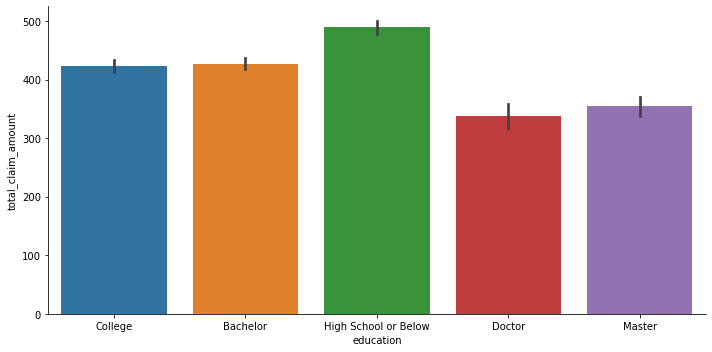

In [26]:
sns.catplot(x = "education", y = "total_claim_amount", data=df, kind = "bar", height = 5, aspect = 2)

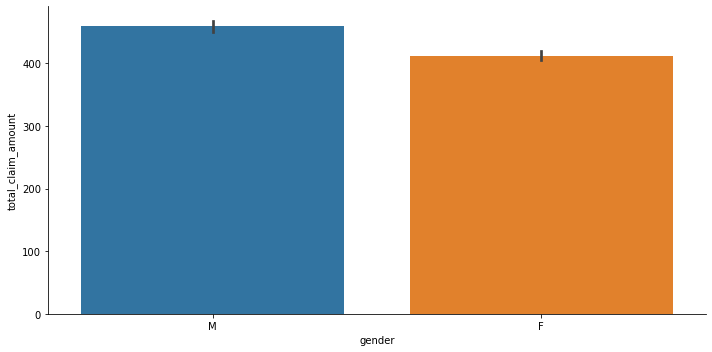

In [27]:
sns.catplot(x= "gender",y = "total_claim_amount", data = df, kind = "bar", height = 5, aspect = 2)

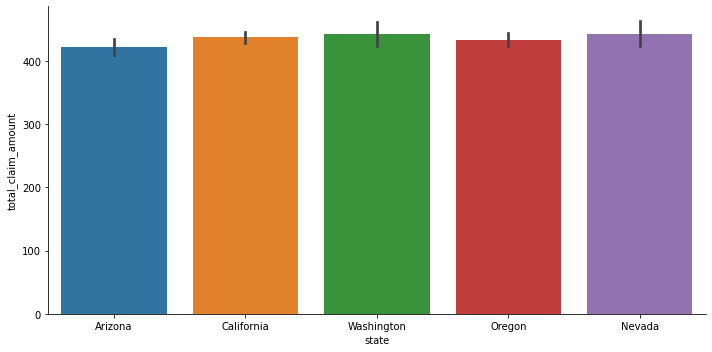

In [28]:
sns.catplot(x= "state", y = "total_claim_amount", data = df, kind = "bar", height = 5, aspect = 2)

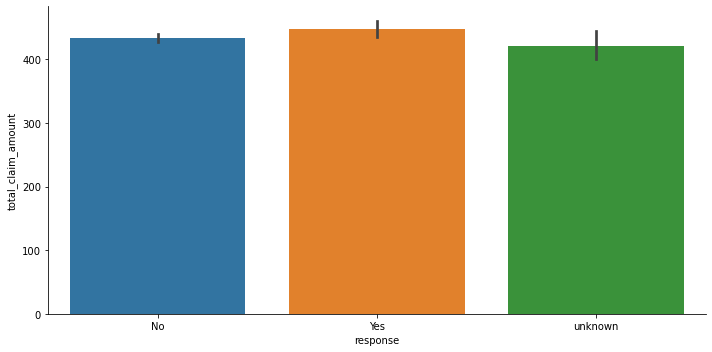

In [29]:
sns.catplot(x= "response", y = "total_claim_amount", data = df, kind = "bar", height = 5, aspect = 2)

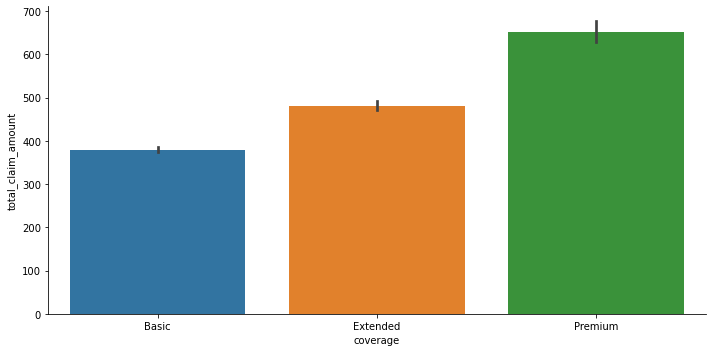

In [30]:
sns.catplot(x= "coverage", y = "total_claim_amount", data = df, kind = "bar", height = 5, aspect = 2)

income


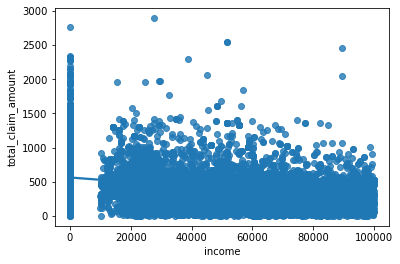

customer_lifetime_value


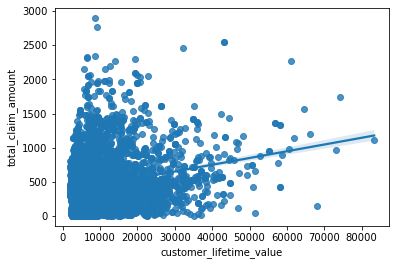

monthly_premium_auto


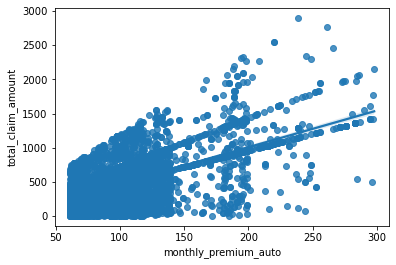

months_since_last_claim


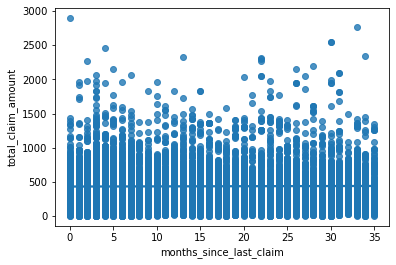

months_since_policy_inception


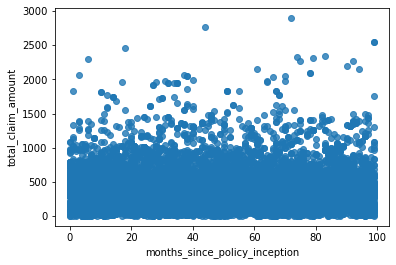

number_of_open_complaints


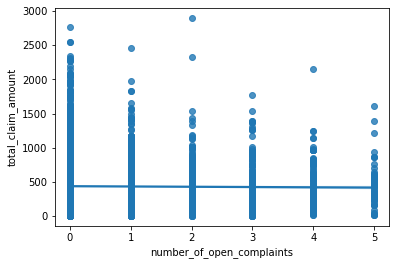

number_of_policies


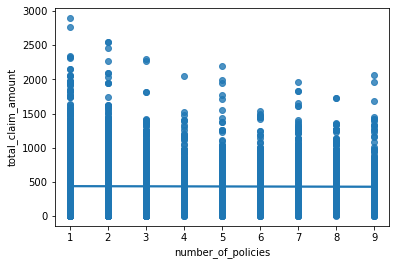

In [31]:
for columns in ['income','customer_lifetime_value','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']:
    print(columns)
    sns.regplot(x=columns,y='total_claim_amount', data = df)
    plt.show()

A horizontal fitted line as observed in months_since_last_claim, months_since_policy_inception, number_of_open_complaints and number_of_polices shows that there is no relationship b/w these variables and total_claim_amount, while customer_lifetime_value and monthly_premium_auto shows slight relationship.As number_of_policies, number_of_open_complaints,months_since_policy_inception are not showing any kind of relationship with our target variable, therfore we will drop these variables now for further anaylsis.

In [32]:
#removing irrelavant variables from our model. 
df = df.drop(columns=['number_of_policies','number_of_open_complaints','months_since_policy_inception'])


In [33]:
# now we have been left with 5 numerical columns. 
df.select_dtypes(include=[np.number])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,total_claim_amount
0,4809.216960,48029,61,7.0,292.800000
1,2228.525238,0,64,3.0,744.924331
2,14947.917300,22139,100,34.0,480.000000
3,22332.439460,49078,97,10.0,484.013411
4,9025.067525,23675,117,3.0,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,3.0,1214.400000
10906,5259.444853,61146,65,7.0,273.018929
10907,23893.304100,39837,201,11.0,381.306996
10908,11971.977650,64195,158,0.0,618.288849


## 04 - Processing Data
### Dealing with outliers.

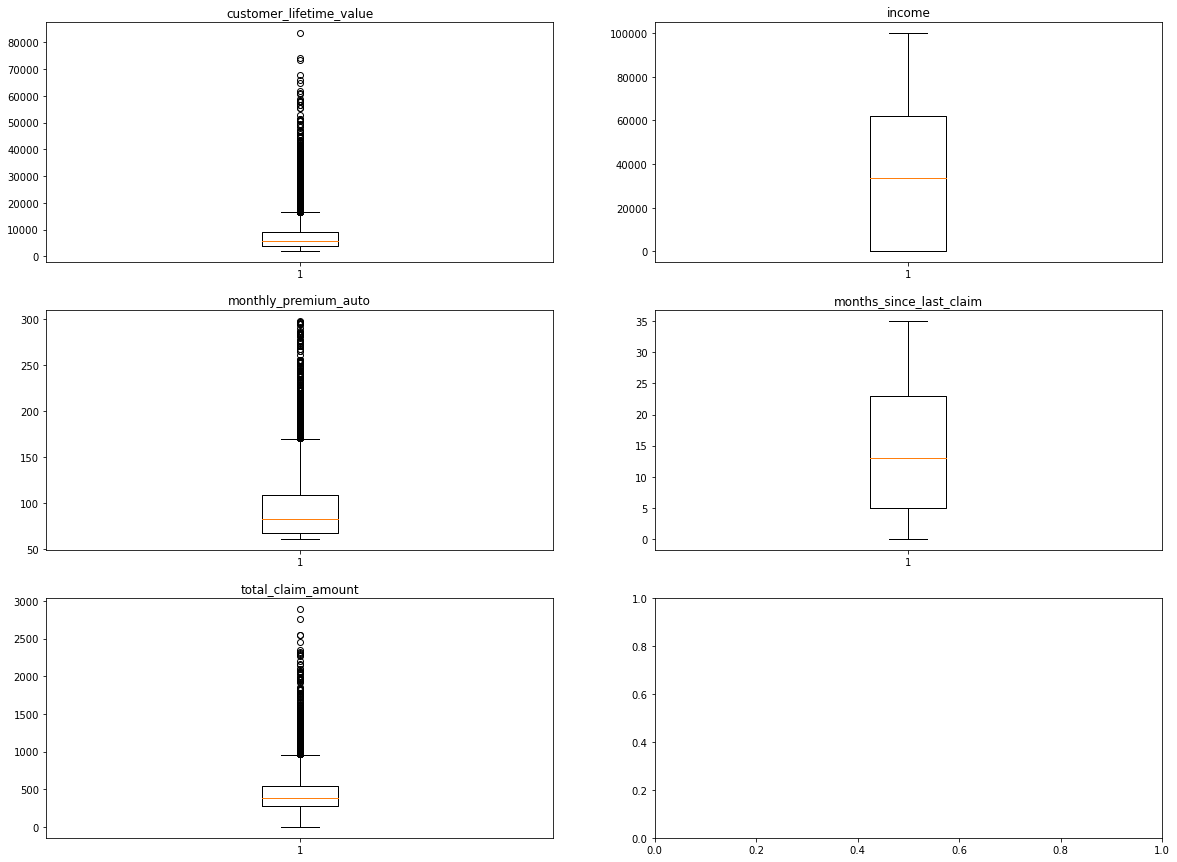

In [34]:
#checking outliers in numerical data
fig, axs = plt.subplots(3,2, figsize=(20,15))

axs[0, 0].boxplot(df['customer_lifetime_value'])
axs[0, 1].boxplot(df['income'])
axs[1, 0].boxplot(df['monthly_premium_auto'])
axs[1, 1].boxplot(df['months_since_last_claim'])
axs[2, 0].boxplot(df['total_claim_amount'])


axs[0, 0].title.set_text('customer_lifetime_value')
axs[0, 1].title.set_text('income')
axs[1, 0].title.set_text('monthly_premium_auto')
axs[1, 1].title.set_text('months_since_last_claim')
axs[2, 0].title.set_text('total_claim_amount')

plt.show()

boxplots shows that there are too many outliers in customer_lifetime_value, monthly_premium_auto, and total_claim_amount. 

In [35]:
#removing outlier with IQR
cols = ['customer_lifetime_value','monthly_premium_auto','total_claim_amount'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

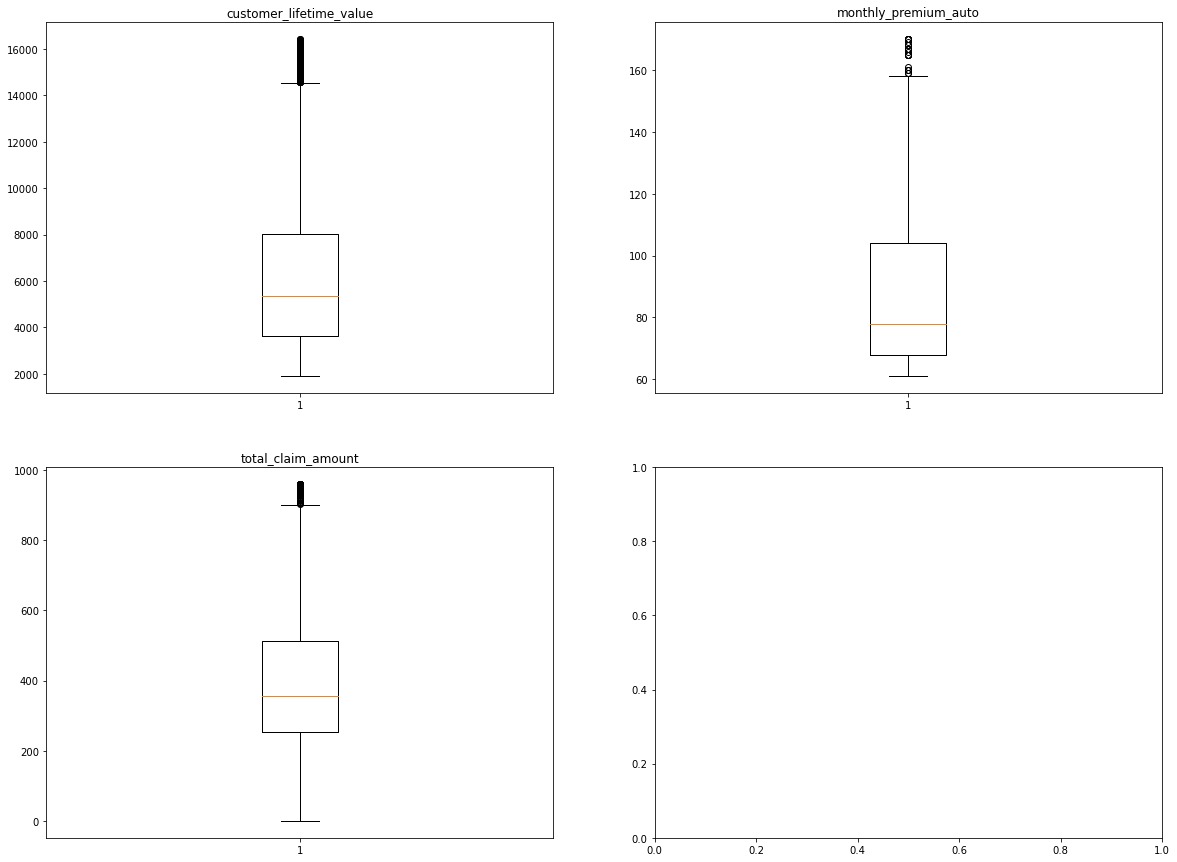

In [36]:
fig, axs = plt.subplots(2,2,figsize=(20,15))

axs[0, 0].boxplot(df['customer_lifetime_value'])
axs[0, 1].boxplot(df['monthly_premium_auto'])
axs[1, 0].boxplot(df['total_claim_amount'])

axs[0, 0].title.set_text('customer_lifetime_value')
axs[0, 1].title.set_text('monthly_premium_auto')
axs[1, 0].title.set_text('total_claim_amount')

plt.show()

New box plots shows that ouliers have been removed in above 3 mentioned variables. 

### X-Y split 

Now after cleaning data, next step is to split explanatory and target variables.As we observed in correlation coefficients that only monhtl_premium_auto, customer_lifetime_value and income has some significant correlation coefficients with total_claim_amount. Therefore we will use only 3 three numerical and other categorical variables for further analysis. Among categorical variables, we will delete customer_id,effective_to_date as they does not make any sense for the anaylsis.

In [37]:
df.columns

Index(['customer_id', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [38]:
#x-y split # x =  explanatory features/variables, y = target vector
#few of explanatory variables has been removed in order to keep the sample small.

features_list = ['state','customer_lifetime_value','response',
       'coverage', 'education', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size']
X = df.loc[:, features_list]

features_list

['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [39]:
X

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
5,California,4745.181764,unknown,Basic,High School or Below,Employed,M,50549,Suburban,Divorced,61,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,Washington,4547.892543,No,Premium,Bachelor,Employed,M,33531,Suburban,Married,116,Personal Auto,Personal L3,Offer4,Agent,Two-Door Car,Medsize
10902,California,3579.023825,No,Extended,High School or Below,Employed,F,28304,Suburban,Married,91,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
10903,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,74,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize


In [40]:
y = df.loc[:, 'total_claim_amount']
y

0        292.800000
1        744.924331
2        480.000000
4        707.925645
5        292.800000
            ...    
10901    801.577478
10902    655.200000
10903    355.200000
10906    273.018929
10908    618.288849
Name: total_claim_amount, Length: 9354, dtype: float64

### Train-Test Split 

In [41]:
#Divide dataset into train and test.
from sklearn.model_selection import train_test_split

print("Splitting data into train and test sets")

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.35, random_state = 0)


Splitting data into train and test sets


In [42]:
X_train

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
9829,Oregon,6185.337641,No,Extended,Master,Employed,M,21020,Rural,Divorced,80,Corporate Auto,Corporate L2,Offer4,Branch,Four-Door Car,Medsize
2880,Arizona,3311.157930,No,Extended,High School or Below,Employed,F,21246,Suburban,Married,83,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4273,Arizona,5217.513287,Yes,Basic,Bachelor,Employed,F,39854,Urban,Divorced,66,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
3108,Arizona,9403.875138,No,Basic,Master,Employed,F,56410,Urban,Married,117,Personal Auto,Personal L2,Offer1,Agent,SUV,Medsize
5219,California,5389.499465,Yes,Extended,College,Employed,M,66429,Rural,Married,136,Corporate Auto,Corporate L3,Offer2,Agent,Sports Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,Oregon,3861.486269,Yes,Extended,College,Employed,F,93272,Urban,Married,95,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10764,California,6889.557028,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,66,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Small
5665,California,2540.407726,unknown,Basic,Doctor,Employed,M,70125,Rural,Single,64,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize
3802,Washington,3580.261881,No,Extended,College,Employed,F,75333,Urban,Married,90,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize


In [43]:
# Training Model

# First import libarires
#StandardardScaler to scale data(i.e. to apply z-score)
#OneHotEncoder to encode categorical variables

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

categorical_features = [0,2,3,4,5,6,8,9,11,12,13,14]
numerical_features = [1,7,10]

#Scale and code separate columns:105555666655

feature_encoder = ColumnTransformer(transformers = [("cate1", categorical_transformer,categorical_features),
                                                   ("num",numeric_transformer,numerical_features),
                                                   ])


In [44]:
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [45]:
X_test

<3274x52 sparse matrix of type '<class 'numpy.float64'>'
	with 49110 stored elements in Compressed Sparse Row format>

### Build Model 

In [46]:
print("Train Model")
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.coef_

Train Model


array([-2.29190424e+00, -3.68775671e+00, -4.72940303e-01, -3.25768370e+00,
        9.71028497e+00,  9.97211825e+00, -1.08013348e+01,  8.29216519e-01,
       -8.50740396e-01,  4.72072347e-01,  3.78668050e-01,  7.73791825e-01,
       -7.34542051e-01,  8.48422250e-02,  8.08488967e+00, -8.20898167e+00,
       -1.33196706e+01, -1.05320807e+01, -1.00259980e+01, -7.93886118e-01,
        3.46716354e+01, -3.29965033e+00,  3.29965033e+00, -1.89391477e+02,
        1.68201514e+02,  2.11899627e+01, -1.51195009e+01, -1.42774027e+01,
        2.93969036e+01, -3.89645018e+00, -1.82332161e+00,  5.71977179e+00,
        1.01696523e+00, -5.30430223e+00,  3.90886826e-01, -9.10030683e-01,
       -8.13027192e-01, -1.00263738e-01,  1.71804732e+01,  7.46121235e-01,
       -1.22068227e+01, -7.15347390e+00,  3.25978558e+00, -3.63068743e-01,
        4.25675707e+00, -1.80679026e+00,  3.10743649e+00, -2.27916503e+00,
        9.78518805e-01,  1.54385951e+00, -5.38203296e+00,  9.03318636e+01])

In [47]:
regressor.intercept_

314.45155304213097

### Testing and modeling predictions

let's now test and predict our model

In [48]:
X_train.shape

(6080, 52)

In [49]:
y_train.shape

(6080,)

In [50]:
### predictions on training set
y_train_pred = regressor.predict(X_train)
y_train_pred

array([ 77.0678981 , 447.04328691, 212.27615535, ...,  57.9994733 ,
       335.32774912, 363.62131986])

In [51]:
# predictions on testing set
y_test_pred = regressor.predict(X_test)
y_test_pred

array([546.36303717, 432.096535  ,   6.47344142, ..., 317.42685158,
       491.9346784 ,  -7.57131989])

### Visualization of predictions on train set vs real values 

In [52]:
x = y_train_pred
y = y_train
t = np.arange(0,x.size)

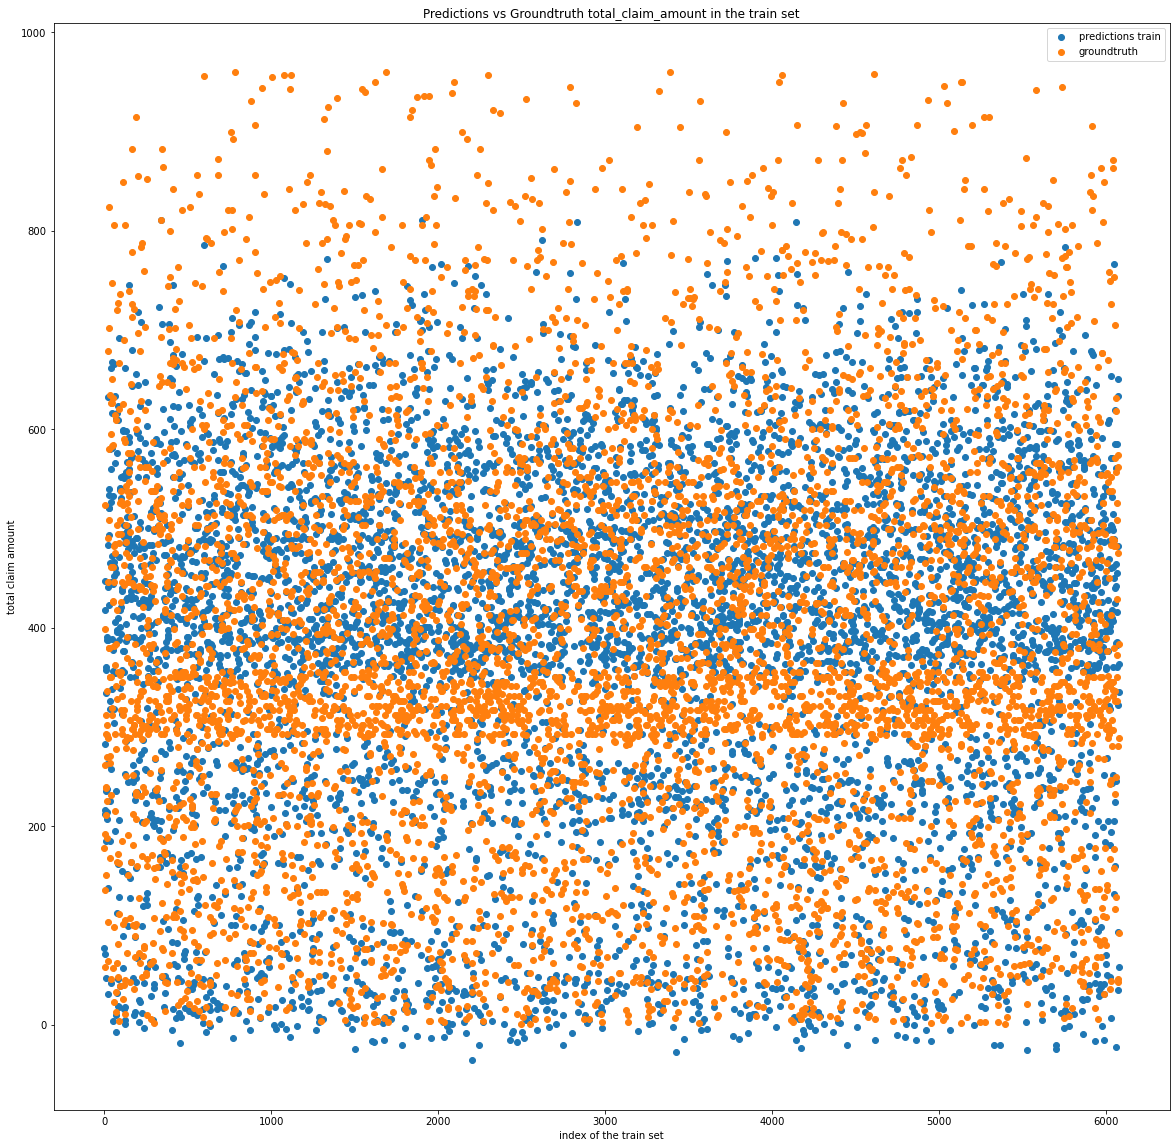

In [53]:
import matplotlib.pyplot as plt

#create the figure and axes object
fig, ax = plt.subplots(figsize=(20,20))

plt.scatter(t,x)
plt.scatter(t,y)

# Add Title
plt.title("Predictions vs Groundtruth total_claim_amount in the train set") 

# Add Axes Labels
plt.xlabel("index of the train set") 
plt.ylabel("total claim amount") 


# Function add a legend  
plt.legend(["predictions train", "groundtruth"], loc ="upper right")
# Display

plt.show()


### Model Validation 

In [54]:
# Performance assessment
print("--- Assessing the performances of the model ---")
print("the r2 score on train  :", regressor.score(X_train, y_train))
print("the r2 score on test  :", regressor.score(X_test, y_test))


--- Assessing the performances of the model ---
the r2 score on train  : 0.7842327992613324
the r2 score on test  : 0.782601364862007


Values of r2 shows that nearly 80% of variation in target variable (total_claim_amount) is explained by explanatory variables for the train as well as for test sets. Model has trained very well as there is almost no difference in the r2 value of train and test sets. 

#### 1.Mean Squared Error

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

9053.610170015447

In [56]:
mean_squared_error(y_test,y_test_pred)

8869.74869429555

#### 3. Root Mean Squared Error

In [57]:
rmse_train = mean_squared_error(y_train,y_train_pred,squared = False)
rmse_train

95.15046069260751

In [58]:
rmse_test = mean_squared_error(y_test,y_test_pred,squared= False)
rmse_test

94.17934324625304

#### 4.Mean Absolute Error 

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_train_pred)

73.04383192232552

In [60]:
mean_absolute_error(y_test,y_test_pred)

72.23567312201043

Values of MSE, RMSE, MAE are not high for the train as well as for test data, which shows that data points are very close to the actual observations

### Feature importance 

In [61]:
categorical_columns_names = feature_encoder.transformers_[0][1].categories_

In [62]:
categorical_columns_names

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes', 'unknown'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]

### Concatenating

Concatenating categorical variables is required in order to destroy structure of array of arrays and return just array of all categorical_columns_names.Afterwards,we can append with the numerical features since we have in the end two arrays of same size that can be append.

In [74]:
categorical_variables=np.concatenate(categorical_columns_names, axis=0 )
categorical_variables

array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', 'No',
       'Yes', 'unknown', 'Basic', 'Extended', 'Premium', 'Bachelor',
       'College', 'Doctor', 'High School or Below', 'Master', 'Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'F', 'M',
       'Rural', 'Suburban', 'Urban', 'Divorced', 'Married', 'Single',
       'Corporate Auto', 'Personal Auto', 'Special Auto', 'Corporate L1',
       'Corporate L2', 'Corporate L3', 'Personal L1', 'Personal L2',
       'Personal L3', 'Special L1', 'Special L2', 'Special L3', 'Offer1',
       'Offer2', 'Offer3', 'Offer4', 'Agent', 'Branch', 'Call Center',
       'Web'], dtype=object)

In [65]:
numerical_columns = X.iloc[:, numerical_features].columns
numerical_columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto'], dtype='object')

In [75]:
#appending categorical and numerical columns.
all_columns_names = np.append(categorical_variables,numerical_columns)
all_columns_names

array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', 'No',
       'Yes', 'unknown', 'Basic', 'Extended', 'Premium', 'Bachelor',
       'College', 'Doctor', 'High School or Below', 'Master', 'Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'F', 'M',
       'Rural', 'Suburban', 'Urban', 'Divorced', 'Married', 'Single',
       'Corporate Auto', 'Personal Auto', 'Special Auto', 'Corporate L1',
       'Corporate L2', 'Corporate L3', 'Personal L1', 'Personal L2',
       'Personal L3', 'Special L1', 'Special L2', 'Special L3', 'Offer1',
       'Offer2', 'Offer3', 'Offer4', 'Agent', 'Branch', 'Call Center',
       'Web', 'customer_lifetime_value', 'income', 'monthly_premium_auto'],
      dtype=object)

In [67]:
all_columns_names

array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', 'No',
       'Yes', 'unknown', 'Basic', 'Extended', 'Premium', 'Bachelor',
       'College', 'Doctor', 'High School or Below', 'Master', 'Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'F', 'M',
       'Rural', 'Suburban', 'Urban', 'Divorced', 'Married', 'Single',
       'Corporate Auto', 'Personal Auto', 'Special Auto', 'Corporate L1',
       'Corporate L2', 'Corporate L3', 'Personal L1', 'Personal L2',
       'Personal L3', 'Special L1', 'Special L2', 'Special L3', 'Offer1',
       'Offer2', 'Offer3', 'Offer4', 'Agent', 'Branch', 'Call Center',
       'Web', 'customer_lifetime_value', 'income', 'monthly_premium_auto'],
      dtype=object)

In [68]:
regressor.coef_.size

52

In [69]:
all_columns_names.size

52

In [70]:
regressor.coef_

array([-2.29190424e+00, -3.68775671e+00, -4.72940303e-01, -3.25768370e+00,
        9.71028497e+00,  9.97211825e+00, -1.08013348e+01,  8.29216519e-01,
       -8.50740396e-01,  4.72072347e-01,  3.78668050e-01,  7.73791825e-01,
       -7.34542051e-01,  8.48422250e-02,  8.08488967e+00, -8.20898167e+00,
       -1.33196706e+01, -1.05320807e+01, -1.00259980e+01, -7.93886118e-01,
        3.46716354e+01, -3.29965033e+00,  3.29965033e+00, -1.89391477e+02,
        1.68201514e+02,  2.11899627e+01, -1.51195009e+01, -1.42774027e+01,
        2.93969036e+01, -3.89645018e+00, -1.82332161e+00,  5.71977179e+00,
        1.01696523e+00, -5.30430223e+00,  3.90886826e-01, -9.10030683e-01,
       -8.13027192e-01, -1.00263738e-01,  1.71804732e+01,  7.46121235e-01,
       -1.22068227e+01, -7.15347390e+00,  3.25978558e+00, -3.63068743e-01,
        4.25675707e+00, -1.80679026e+00,  3.10743649e+00, -2.27916503e+00,
        9.78518805e-01,  1.54385951e+00, -5.38203296e+00,  9.03318636e+01])

Now we will rank all the columns by importance using coefficients

In [92]:
feature_importance = pd.DataFrame({"feature_names": all_columns_names, "coefficients": regressor.coef_})

In [93]:
feature_importance # values with true symbols

,feature_names,coefficients
0,Arizona,-2.291904
1,California,-3.687757
2,Nevada,-0.472940
3,Oregon,-3.257684
4,Washington,9.710285
5,No,9.972118
6,Yes,-10.801335
7,unknown,0.829217
8,Basic,-0.850740
9,Extended,0.472072


### Ranking Features 

In [116]:
#the feature importance by coefficients sorted by biggest value
feature_importance.sort_values(by="coefficients", ascending= False) # importance by converting values to absolute values. 

,feature_names,coefficients
23,Rural,189.391477
24,Suburban,168.201514
51,monthly_premium_auto,90.331864
20,Unemployed,34.671635
28,Single,29.396904
25,Urban,21.189963
38,Special L1,17.180473
26,Divorced,15.119501
27,Married,14.277403
16,Disabled,13.319671


In [114]:
## now we could plot the best features. 
top_15_important_features = pd.concat([feature_importance.sort_values(by="coefficients", ascending= False).iloc[0:15,:]],axis=1)
data

,feature_names,coefficients
23,Rural,189.391477
24,Suburban,168.201514
51,monthly_premium_auto,90.331864
20,Unemployed,34.671635
28,Single,29.396904
25,Urban,21.189963
38,Special L1,17.180473
26,Divorced,15.119501
27,Married,14.277403
16,Disabled,13.319671


### 15 Best Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Rural'),
  Text(1, 0, 'Suburban'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Single'),
  Text(5, 0, 'Urban'),
  Text(6, 0, 'Special L1'),
  Text(7, 0, 'Divorced'),
  Text(8, 0, 'Married'),
  Text(9, 0, 'Disabled'),
  Text(10, 0, 'Special L3'),
  Text(11, 0, 'Yes'),
  Text(12, 0, 'Employed'),
  Text(13, 0, 'Medical Leave'),
  Text(14, 0, 'No')])

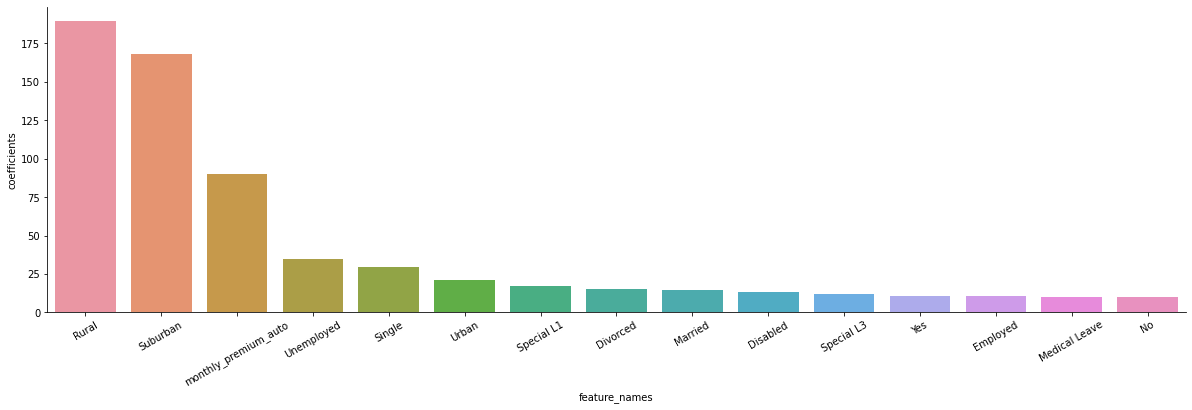

In [121]:
sns.catplot(x = "feature_names",
            y = "coefficients",
            data = top_15_important_features,
            kind ="bar", aspect= 20/6)
plt.xticks(rotation=30)

plot shows,top 15 features that are best to explain variations in target variable.Next step can be to run the model with selected features and to check whether the score improves or not. 